In [2]:
!pip install pycaret-nightly

In [8]:
import pandas as pd
from pycaret.classification import *

In [9]:
from pycaret.utils import version
version()

pycaret-nightly-0.33


In [10]:
print(pd.__version__)

1.0.1


In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [7]:
%load_ext google.colab.data_table

In [12]:
df = pd.read_csv("/content/drive/My Drive/Milestone 1 CSV - June 29/merged_final_n.csv")

In [13]:
df = df.drop("Unnamed: 0",axis=1)

In [14]:
df.head()

,milestones,relationships,Web?,Software?,Consulting?,Gamesvideo?,Ecommerce?,Mobile?,Enterprise?,Cleantech?,Hardware?,Biotech?,Search?,Advertising?,Security?,Analytics?,Realestate?,Tech?,funding_rounds_bin1,funding_rounds_bin2,funding_rounds_bin3,investment_rounds_bin1,investment_rounds_bin2,funding_total_usd_bin1,funding_total_usd_bin2,funding_total_usd_bin3,funding_total_usd_bin4,valuation_amount_bin1,valuation_amount_bin2,valuation_amount_bin3,valuation_amount_bin4,raised_amount_bin1,raised_amount_bin2,raised_amount_bin3,raised_amount_bin4,CA,NY,TX,MA,WA,Target,Series_A_Amount_FE,Series_B_Amount_FE,Series_C_Amount_FE
0,NaN,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,NaN,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,NaN,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,NaN,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,NaN,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [15]:
df.shape

(196607, 44)

In [16]:
data = df.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (157286, 44)
Unseen Data For Predictions: (39321, 44)


In [11]:
exp_clf101 = setup(data = data, 
                   target = 'Target', 
                   session_id=123,
                   log_experiment=True,
                   experiment_name='pycaret-deployment',
                   bin_numeric_features = ['relationships']
                   ) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(157286, 44)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,39
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [13]:
best_model = compare_models(whitelist=['ridge','xgboost','catboost','gbc','ada'],sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.9472,0.0000,0.0204,0.9327,0.0399,0.0377,0.1328,0.2754
1,Extreme Gradient Boosting,0.9468,0.6581,0.0142,0.8849,0.0278,0.0262,0.1066,16.1915
2,Gradient Boosting Classifier,0.9471,0.6557,0.0224,0.8340,0.0436,0.0409,0.1308,15.1369
3,Ada Boost Classifier,0.9469,0.6526,0.0218,0.7639,0.0422,0.0393,0.1220,5.5615
4,CatBoost Classifier,0.9464,0.6625,0.0297,0.5472,0.0562,0.0510,0.1181,46.2036


In [14]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [15]:
tuned_best_model = tune_model(best_model, optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9476,0.0000,0.0304,0.9000,0.0587,0.0554,0.1599
1,0.9473,0.0000,0.0219,1.0000,0.0429,0.0407,0.1441
2,0.9469,0.0000,0.0152,0.9000,0.0299,0.0281,0.1130
3,0.9478,0.0000,0.0304,1.0000,0.0589,0.0559,0.1696
4,0.9474,0.0000,0.0236,1.0000,0.0461,0.0438,0.1496
5,0.9468,0.0000,0.0152,0.8182,0.0298,0.0279,0.1071
6,0.9471,0.0000,0.0185,1.0000,0.0364,0.0345,0.1325
7,0.9466,0.0000,0.0135,0.7273,0.0265,0.0246,0.0943
8,0.9472,0.0000,0.0202,1.0000,0.0397,0.0376,0.1384
9,0.9469,0.0000,0.0152,0.9000,0.0299,0.0281,0.1130


In [16]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.6522,0.0236,1.0000,0.0461,0.0438,0.1496
1,0.9470,0.6547,0.0169,0.9091,0.0331,0.0312,0.1198
2,0.9469,0.6584,0.0152,0.9000,0.0299,0.0281,0.1130
3,0.9471,0.6703,0.0202,0.9231,0.0396,0.0374,0.1324
4,0.9469,0.6445,0.0169,0.8333,0.0331,0.0310,0.1141
5,0.9465,0.6694,0.0118,0.7000,0.0232,0.0215,0.0863
6,0.9467,0.6579,0.0101,1.0000,0.0200,0.0190,0.0979
7,0.9465,0.6596,0.0101,0.7500,0.0200,0.0186,0.0832
8,0.9466,0.6557,0.0084,1.0000,0.0167,0.0158,0.0893
9,0.9465,0.6586,0.0084,0.8333,0.0167,0.0156,0.0806


In [17]:
#xgboost_tuned = tune_model(xgboost)

In [18]:
xl_logs = get_logs(save=True)

Plot a Model

AUC Plot

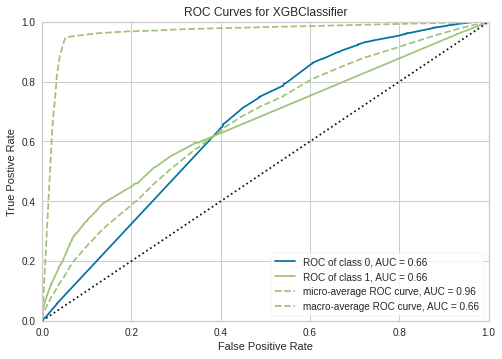

In [19]:
plot_model(xgboost, plot = 'auc')

Precision-Recall Curve

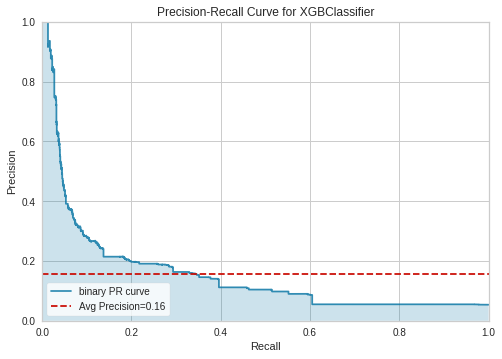

In [20]:
plot_model(xgboost, plot = 'pr')

Feature Importance Plot

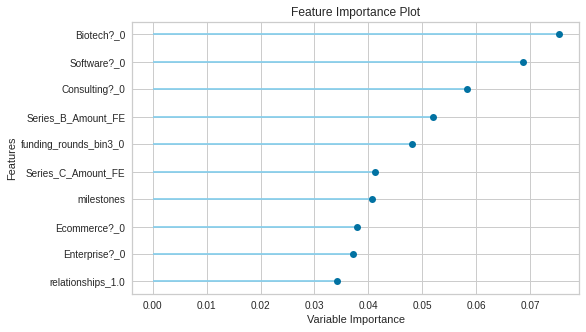

In [21]:
plot_model(xgboost, plot='feature')

Confusion Matrix

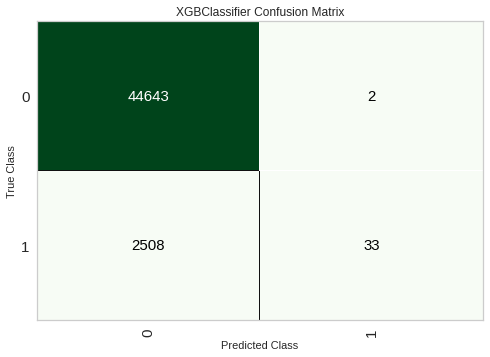

In [22]:
plot_model(xgboost, plot = 'confusion_matrix')

In [23]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

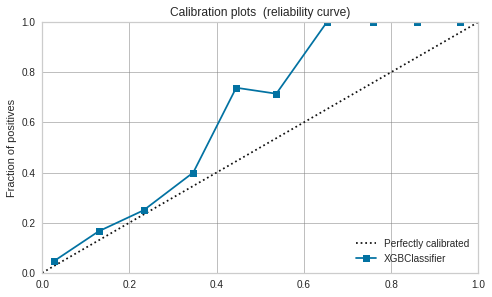

In [25]:
plot_model(xgboost, plot='calibration')

In [27]:
calibrated_xgboost = calibrate_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9479,0.6571,0.0455,0.7714,0.0860,0.0805,0.1795
1,0.9462,0.6574,0.0202,0.5217,0.0390,0.0351,0.0948
2,0.9460,0.6577,0.0320,0.4872,0.0601,0.0538,0.1144
3,0.9467,0.6699,0.0337,0.5882,0.0638,0.0583,0.1318
4,0.9464,0.6443,0.0405,0.5333,0.0752,0.0682,0.1361
5,0.9459,0.6715,0.0304,0.4615,0.0570,0.0507,0.1077
6,0.9465,0.6590,0.0270,0.5714,0.0515,0.0469,0.1158
7,0.9460,0.6584,0.0202,0.4615,0.0388,0.0344,0.0879
8,0.9467,0.6573,0.0287,0.6071,0.0548,0.0501,0.1238
9,0.9462,0.6574,0.0287,0.5152,0.0543,0.0489,0.1120


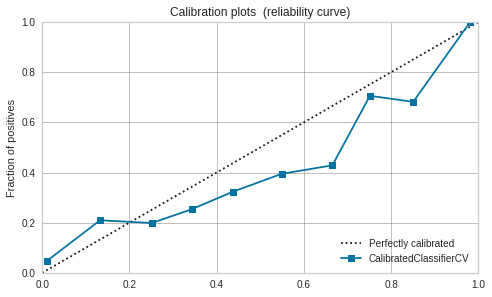

In [30]:
plot_model(calibrated_xgboost, plot='calibration')

Predict on test / hold-out Sample

In [31]:
predict_model(xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9468,0.6604,0.013,0.9429,0.0256,0.0242,0.1073


Finalize Model for Deployment

In [38]:
final_model = finalize_model(xgboost)

In [39]:
#Final Random Forest model parameters for deployment
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [40]:
predict_model(xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9468,0.6604,0.013,0.9429,0.0256,0.0242,0.1073


Predict on unseen data

In [41]:
unseen_predictions = predict_model(xgboost, data=data_unseen)
unseen_predictions.head()

,milestones,relationships,Web?,Software?,Consulting?,Gamesvideo?,Ecommerce?,Mobile?,Enterprise?,Cleantech?,Hardware?,Biotech?,Search?,Advertising?,Security?,Analytics?,Realestate?,Tech?,funding_rounds_bin1,funding_rounds_bin2,funding_rounds_bin3,investment_rounds_bin1,investment_rounds_bin2,funding_total_usd_bin1,funding_total_usd_bin2,funding_total_usd_bin3,funding_total_usd_bin4,valuation_amount_bin1,valuation_amount_bin2,valuation_amount_bin3,valuation_amount_bin4,raised_amount_bin1,raised_amount_bin2,raised_amount_bin3,raised_amount_bin4,CA,NY,TX,MA,WA,Target,Series_A_Amount_FE,Series_B_Amount_FE,Series_C_Amount_FE,Label,Score
0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0397
1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0397
2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0397
3,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0397
4,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0397


Saving the model

In [50]:
#deploy_model(xgboost, model_name = 'xgboost')

In [42]:
save_model(final_model,'best_model-07-19-2020')

Transformation Pipeline and Model Succesfully Saved


In [10]:
loaded_model = load_model('/content/drive/My Drive/Colab Notebooks/3. Modelling/best_model-07-19-2020')

Transformation Pipeline and Model Sucessfully Loaded


In [17]:
new_prediction = predict_model(loaded_model, data=data_unseen)
new_prediction.head()

,milestones,relationships,Web?,Software?,Consulting?,Gamesvideo?,Ecommerce?,Mobile?,Enterprise?,Cleantech?,Hardware?,Biotech?,Search?,Advertising?,Security?,Analytics?,Realestate?,Tech?,funding_rounds_bin1,funding_rounds_bin2,funding_rounds_bin3,investment_rounds_bin1,investment_rounds_bin2,funding_total_usd_bin1,funding_total_usd_bin2,funding_total_usd_bin3,funding_total_usd_bin4,valuation_amount_bin1,valuation_amount_bin2,valuation_amount_bin3,valuation_amount_bin4,raised_amount_bin1,raised_amount_bin2,raised_amount_bin3,raised_amount_bin4,CA,NY,TX,MA,WA,Target,Series_A_Amount_FE,Series_B_Amount_FE,Series_C_Amount_FE,Label,Score
0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0393
1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0393
2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0393
3,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0393
4,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0393
